In [1]:
# =====================================================
# 🚗 US Accidents — Optimized Data Cleaning (Colab Safe)
# =====================================================

import pandas as pd
import numpy as np

# Optional: prettier display
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

# =====================================================
# 1️⃣ Load Dataset Efficiently
# =====================================================

# Load only required columns (for cleaning + analysis)
cols_to_use = [
    'ID', 'Severity', 'Start_Time', 'End_Time', 'City', 'State',
    'Temperature(F)', 'Visibility(mi)', 'Pressure(in)',
    'Humidity(%)', 'Weather_Condition', 'Wind_Direction'
]

# Sample ~400,000 rows to prevent memory crashes
# (This is roughly 5% of total data, still statistically representative)
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv',
                 usecols=cols_to_use, nrows=400000)

print("✅ Dataset Loaded Successfully!")
print(f"Shape of dataset: {df.shape}")

# =====================================================
# 2️⃣ Optimize Datatypes to Save Memory
# =====================================================

# Convert categorical text columns
cat_cols = ['City', 'State', 'Weather_Condition', 'Wind_Direction']
for col in cat_cols:
    df[col] = df[col].astype('category')

# Convert Severity to small integer type
df['Severity'] = df['Severity'].astype('int8')

print("\n💾 Memory usage after optimization:")
print(f"{df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# =====================================================
# 3️⃣ Datetime Cleaning & Conversion
# =====================================================

# Define columns to clean
datetime_cols = ['Start_Time', 'End_Time']

def clean_datetime_columns(df, cols):
    for col in cols:
        print(f"⏱️ Cleaning datetime column: {col}")
        # Convert to string, strip trailing .000000000
        df[col] = df[col].astype(str).str.replace(r'\.000+','', regex=True)
        # Convert safely to datetime (mixed formats supported)
        df[col] = pd.to_datetime(df[col], errors='coerce', format='mixed', utc=True)
    return df

df = clean_datetime_columns(df, datetime_cols)

print("\n✅ Datetime columns cleaned successfully!")
print(df[datetime_cols].dtypes)

# =====================================================
# 4️⃣ Extract Date & Time Features
# =====================================================

df['Start_Year'] = df['Start_Time'].dt.year
df['Start_Month'] = df['Start_Time'].dt.month
df['Start_Day'] = df['Start_Time'].dt.day
df['Start_Hour'] = df['Start_Time'].dt.hour
df['Start_DayOfWeek'] = df['Start_Time'].dt.day_name()

print("\n📅 Extracted new time-based features:")
print(df[['Start_Year','Start_Month','Start_Day','Start_Hour','Start_DayOfWeek']].head())

# =====================================================
# 5️⃣ Handle Missing Values
# =====================================================

# Show missing summary
missing = df.isnull().sum().sort_values(ascending=False)
print("\n🔍 Top 10 columns with missing values:")
print(missing.head(10))

# Fill weather-related columns
fill_median_cols = ['Temperature(F)', 'Visibility(mi)', 'Pressure(in)', 'Humidity(%)']
fill_mode_cols = ['Weather_Condition', 'Wind_Direction']

for col in fill_median_cols:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

for col in fill_mode_cols:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\n✅ Filled missing values in selected columns.")

# =====================================================
# 6️⃣ Basic Validation & Summary
# =====================================================

print("\n📊 Severity Distribution:")
print(df['Severity'].value_counts())

print("\n🗺️ Top 10 States by Accident Count:")
print(df['State'].value_counts().head(10))

# =====================================================
# 7️⃣ Save Cleaned Data
# =====================================================

df.to_csv('US_Accidents_Cleaned_Sample.csv', index=False)
print("\n💾 Cleaned dataset saved as 'US_Accidents_Cleaned_Sample.csv'")
print("📦 Ready for EDA or Modeling!")


✅ Dataset Loaded Successfully!
Shape of dataset: (400000, 12)

💾 Memory usage after optimization:
88.39 MB
⏱️ Cleaning datetime column: Start_Time
⏱️ Cleaning datetime column: End_Time

✅ Datetime columns cleaned successfully!
Start_Time    datetime64[ns, UTC]
End_Time      datetime64[ns, UTC]
dtype: object

📅 Extracted new time-based features:
   Start_Year  Start_Month  Start_Day  Start_Hour Start_DayOfWeek
0        2016            2          8           5          Monday
1        2016            2          8           6          Monday
2        2016            2          8           6          Monday
3        2016            2          8           7          Monday
4        2016            2          8           7          Monday

🔍 Top 10 columns with missing values:
Visibility(mi)       8779
Weather_Condition    8208
Humidity(%)          6509
Temperature(F)       5915
Pressure(in)         4647
Wind_Direction       3230
City                   19
ID                      0
End_Time  

/tmp/ipython-input-2862859131.py:95: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2862859131.py:99: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


💾 Cleaned dataset saved as 'US_Accidents_Cleaned_Sample.csv'
📦 Ready for EDA or Modeling!


📦 Downloading dataset...
Using Colab cache for faster access to the 'us-accidents' dataset.
✅ Dataset downloaded at: /kaggle/input/us-accidents
📂 Loading selected columns...
✅ Data loaded successfully!
Shape of dataset: (7728394, 13)

🧹 Cleaning and transforming data...
✅ Features extracted successfully!
           Start_Time  Hour     Month     Day
2 2016-02-08 06:49:27     6  February  Monday
3 2016-02-08 07:23:34     7  February  Monday
4 2016-02-08 07:39:07     7  February  Monday
5 2016-02-08 07:44:26     7  February  Monday
6 2016-02-08 07:59:35     7  February  Monday
✅ Sample of 50,000 rows created for plotting.


/tmp/ipython-input-382128189.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df_sample, palette='crest')


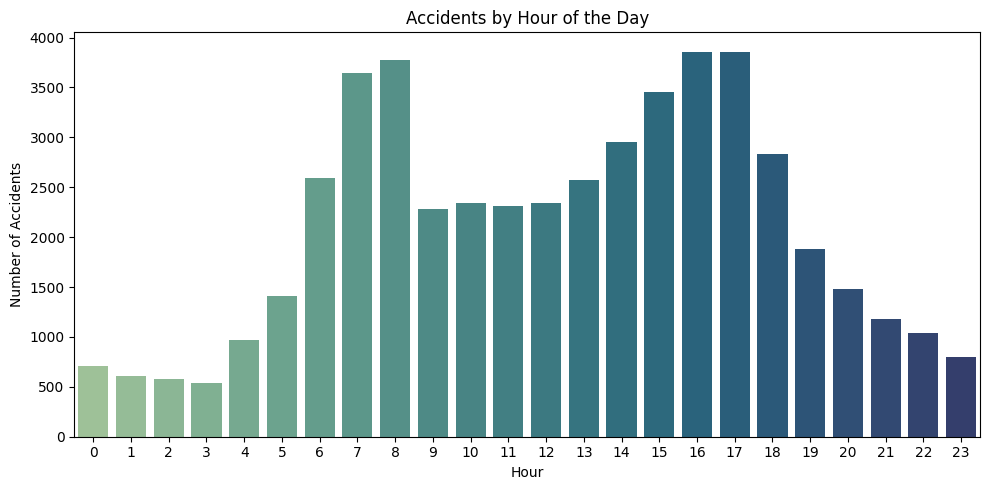

/tmp/ipython-input-382128189.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.values, y=top_weather.index, palette='viridis')


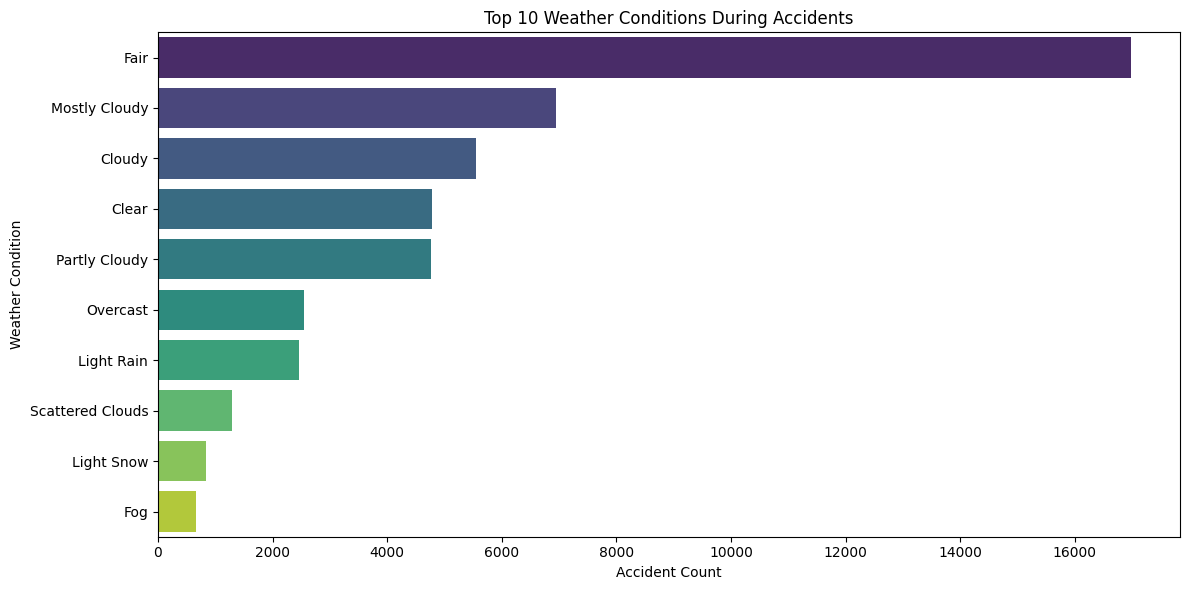

/tmp/ipython-input-382128189.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Visibility(mi)', data=df_sample, palette='mako')


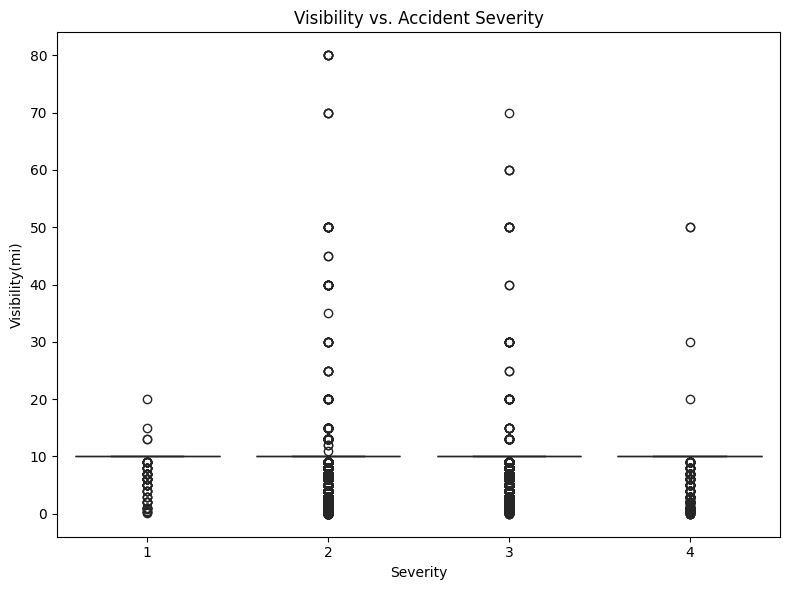


🌎 Generating accident hotspot heatmap (sample of 10,000 points)...
✅ Heatmap saved as 'us_accidents_hotspots.html'

✅ Analysis Completed Successfully!
Total records analyzed: 6,357,778
You can open 'us_accidents_hotspots.html' to view accident hotspots on a map.


In [2]:
# ======================================================
# 🚗 Task 4: US Traffic Accidents Data Analysis (Optimized)
# ======================================================

# Step 1: Install and import necessary libraries
!pip install kagglehub folium plotly --quiet

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px

# Step 2: Download the dataset using kagglehub
print("📦 Downloading dataset...")
path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")
print("✅ Dataset downloaded at:", path)

# Step 3: Load the dataset (read only required columns to save memory)
use_cols = [
    'ID', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'City', 'State',
    'Temperature(F)', 'Weather_Condition', 'Visibility(mi)', 'Humidity(%)',
    'Wind_Speed(mph)', 'Sunrise_Sunset'
]

print("📂 Loading selected columns...")
df = pd.read_csv(f"{path}/US_Accidents_March23.csv", usecols=use_cols)
print("✅ Data loaded successfully!")
print("Shape of dataset:", df.shape)

# Step 4: Quick cleaning and feature extraction
print("\n🧹 Cleaning and transforming data...")
df.dropna(inplace=True)
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df = df.dropna(subset=['Start_Time'])

# Extract useful time-based features
df['Hour'] = df['Start_Time'].dt.hour
df['Month'] = df['Start_Time'].dt.month_name()
df['Day'] = df['Start_Time'].dt.day_name()

print("✅ Features extracted successfully!")
print(df[['Start_Time', 'Hour', 'Month', 'Day']].head())

# Step 5: Sample data to prevent memory crash in plots
df_sample = df.sample(50000, random_state=42)  # smaller subset for visualization
print("✅ Sample of 50,000 rows created for plotting.")

# Step 6: Visual 1 — Accidents by hour of day
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df_sample, palette='crest')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

# Step 7: Visual 2 — Top 10 weather conditions
plt.figure(figsize=(12,6))
top_weather = df_sample['Weather_Condition'].value_counts().nlargest(10)
sns.barplot(x=top_weather.values, y=top_weather.index, palette='viridis')
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Accident Count')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

# Step 8: Visual 3 — Visibility vs Severity
plt.figure(figsize=(8,6))
sns.boxplot(x='Severity', y='Visibility(mi)', data=df_sample, palette='mako')
plt.title('Visibility vs. Accident Severity')
plt.tight_layout()
plt.show()

# Step 9: Visual 4 — Interactive monthly distribution
fig = px.histogram(
    df_sample,
    x='Month',
    color='Severity',
    barmode='group',
    title='Monthly Distribution of Accidents by Severity'
)
fig.show()

# Step 10: Visual 5 — Heatmap of accident hotspots
print("\n🌎 Generating accident hotspot heatmap (sample of 10,000 points)...")
heat_df = df_sample.sample(10000, random_state=42)
heatmap = folium.Map(location=[39.5, -98.35], zoom_start=4, tiles='CartoDB dark_matter')
HeatMap(list(zip(heat_df['Start_Lat'], heat_df['Start_Lng']))).add_to(heatmap)
heatmap.save('us_accidents_hotspots.html')
print("✅ Heatmap saved as 'us_accidents_hotspots.html'")

# Step 11: Summary
print("\n✅ Analysis Completed Successfully!")
print(f"Total records analyzed: {len(df):,}")
print("You can open 'us_accidents_hotspots.html' to view accident hotspots on a map.")
